In [112]:
import os,time
#setting current timezone
os.environ['TZ'] = 'US/Eastern'


In [113]:
import csv
import tweepy
import yfinance as yf
import datetime
from datetime import date,timedelta
import pytz
from pytz import timezone
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
#Search 30 popular tweets that mention "DOGE" per day from last 7-day tweets
#collect retweet counts of tweets 

#authentication
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""
        
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

today = date.today()
time_list = []
retweet_nums = []

for i in range(7):
    tweets = api.search_tweets( q = "$DOGE",until = today - timedelta(days = i),lang = "en",result_type = "popular",count = 30)
    for tweet in tweets:
        time_list.append(tweet.created_at+timedelta(hours=-4))
        retweet_nums.append(tweet.retweet_count)
        
tweet_df = pd.DataFrame()        
tweet_df['Time'] = time_list
tweet_df['Retweet_Count'] = retweet_nums 
display(tweet_df)



,Time,Retweet_Count
0,2021-10-17 10:06:31+00:00,299
1,2021-10-18 01:35:31+00:00,281
2,2021-10-18 09:07:57+00:00,108
3,2021-10-17 17:43:32+00:00,293
4,2021-10-18 07:30:41+00:00,148
...,...,...
71,2021-10-11 08:39:18+00:00,419
72,2021-10-11 15:02:42+00:00,209
73,2021-10-10 13:04:50+00:00,242
74,2021-10-12 10:00:01+00:00,243


In [114]:
#saving data to csv
tweet_df.to_csv(d.strftime("%m-%d-%Y")+'.csv',sep ='\t')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-10-12 03:00:00+01:00,0.228734,0.228922,0.225279,0.225753,0,0,0
2021-10-12 04:00:00+01:00,0.225935,0.226329,0.222669,0.223561,38757632,0,0
2021-10-12 05:00:00+01:00,0.224019,0.227158,0.223095,0.227158,14803840,0,0
2021-10-12 06:00:00+01:00,0.226980,0.227078,0.222610,0.226430,32946304,0,0
2021-10-12 07:00:00+01:00,0.226244,0.226902,0.224496,0.224496,1586304,0,0
...,...,...,...,...,...,...,...
2021-10-18 23:00:00+01:00,0.247247,0.247247,0.244597,0.246904,0,0,0
2021-10-19 00:00:00+01:00,0.247300,0.248359,0.245253,0.247281,0,0,0
2021-10-19 01:00:00+01:00,0.247378,0.248850,0.243274,0.243274,16351744,0,0
2021-10-19 02:00:00+01:00,0.243561,0.247318,0.243561,0.246172,19886592,0,0


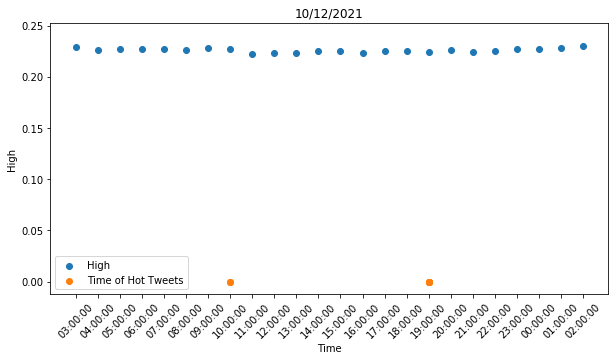

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-10-12 03:00:00+01:00,0.228734,0.228922,0.225279,0.225753,0,0,0
2021-10-12 04:00:00+01:00,0.225935,0.226329,0.222669,0.223561,38757632,0,0
2021-10-12 05:00:00+01:00,0.224019,0.227158,0.223095,0.227158,14803840,0,0
2021-10-12 06:00:00+01:00,0.226980,0.227078,0.222610,0.226430,32946304,0,0
2021-10-12 07:00:00+01:00,0.226244,0.226902,0.224496,0.224496,1586304,0,0
...,...,...,...,...,...,...,...
2021-10-18 23:00:00+01:00,0.247247,0.247247,0.244597,0.246904,0,0,0
2021-10-19 00:00:00+01:00,0.247300,0.248359,0.245253,0.247281,0,0,0
2021-10-19 01:00:00+01:00,0.247378,0.248850,0.243274,0.243274,16351744,0,0
2021-10-19 02:00:00+01:00,0.243561,0.247318,0.243561,0.246172,19886592,0,0


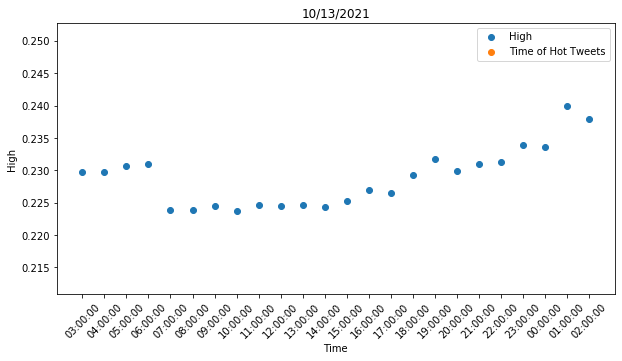

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-10-12 03:00:00+01:00,0.228734,0.228922,0.225279,0.225753,0,0,0
2021-10-12 04:00:00+01:00,0.225935,0.226329,0.222669,0.223561,38757632,0,0
2021-10-12 05:00:00+01:00,0.224019,0.227158,0.223095,0.227158,14803840,0,0
2021-10-12 06:00:00+01:00,0.226980,0.227078,0.222610,0.226430,32946304,0,0
2021-10-12 07:00:00+01:00,0.226244,0.226902,0.224496,0.224496,1586304,0,0
...,...,...,...,...,...,...,...
2021-10-18 23:00:00+01:00,0.247247,0.247247,0.244597,0.246904,0,0,0
2021-10-19 00:00:00+01:00,0.247300,0.248359,0.245253,0.247281,0,0,0
2021-10-19 01:00:00+01:00,0.247378,0.248850,0.243274,0.243274,16351744,0,0
2021-10-19 02:00:00+01:00,0.243561,0.247318,0.243561,0.246172,19886592,0,0


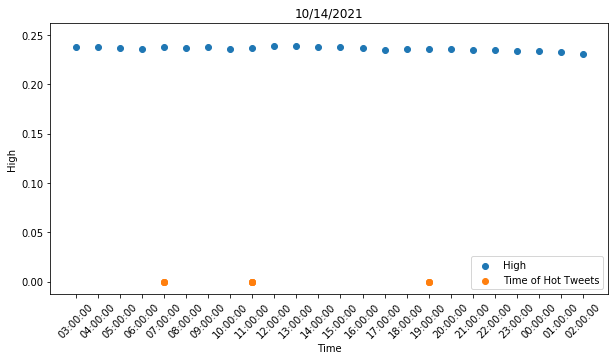

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-10-12 03:00:00+01:00,0.228734,0.228922,0.225279,0.225753,0,0,0
2021-10-12 04:00:00+01:00,0.225935,0.226329,0.222669,0.223561,38757632,0,0
2021-10-12 05:00:00+01:00,0.224019,0.227158,0.223095,0.227158,14803840,0,0
2021-10-12 06:00:00+01:00,0.226980,0.227078,0.222610,0.226430,32946304,0,0
2021-10-12 07:00:00+01:00,0.226244,0.226902,0.224496,0.224496,1586304,0,0
...,...,...,...,...,...,...,...
2021-10-18 23:00:00+01:00,0.247247,0.247247,0.244597,0.246904,0,0,0
2021-10-19 00:00:00+01:00,0.247300,0.248359,0.245253,0.247281,0,0,0
2021-10-19 01:00:00+01:00,0.247378,0.248850,0.243274,0.243274,16351744,0,0
2021-10-19 02:00:00+01:00,0.243561,0.247318,0.243561,0.246172,19886592,0,0


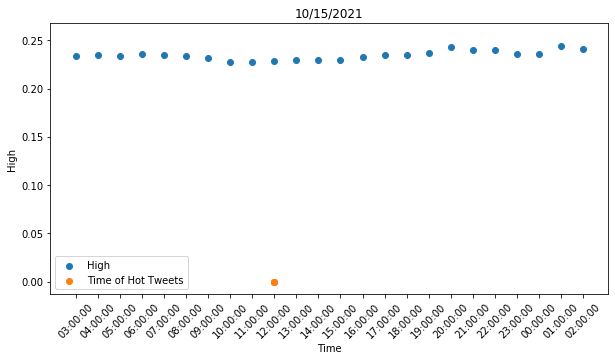

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-10-12 03:00:00+01:00,0.228734,0.228922,0.225279,0.225753,0,0,0
2021-10-12 04:00:00+01:00,0.225935,0.226329,0.222669,0.223561,38757632,0,0
2021-10-12 05:00:00+01:00,0.224019,0.227158,0.223095,0.227158,14803840,0,0
2021-10-12 06:00:00+01:00,0.226980,0.227078,0.222610,0.226430,32946304,0,0
2021-10-12 07:00:00+01:00,0.226244,0.226902,0.224496,0.224496,1586304,0,0
...,...,...,...,...,...,...,...
2021-10-18 23:00:00+01:00,0.247247,0.247247,0.244597,0.246904,0,0,0
2021-10-19 00:00:00+01:00,0.247300,0.248359,0.245253,0.247281,0,0,0
2021-10-19 01:00:00+01:00,0.247378,0.248850,0.243274,0.243274,16351744,0,0
2021-10-19 02:00:00+01:00,0.243561,0.247318,0.243561,0.246172,19886592,0,0


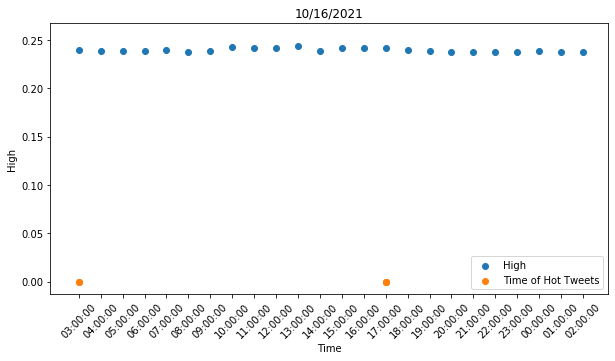

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-10-12 03:00:00+01:00,0.228734,0.228922,0.225279,0.225753,0,0,0
2021-10-12 04:00:00+01:00,0.225935,0.226329,0.222669,0.223561,38757632,0,0
2021-10-12 05:00:00+01:00,0.224019,0.227158,0.223095,0.227158,14803840,0,0
2021-10-12 06:00:00+01:00,0.226980,0.227078,0.222610,0.226430,32946304,0,0
2021-10-12 07:00:00+01:00,0.226244,0.226902,0.224496,0.224496,1586304,0,0
...,...,...,...,...,...,...,...
2021-10-18 23:00:00+01:00,0.247247,0.247247,0.244597,0.246904,0,0,0
2021-10-19 00:00:00+01:00,0.247300,0.248359,0.245253,0.247281,0,0,0
2021-10-19 01:00:00+01:00,0.247378,0.248850,0.243274,0.243274,16351744,0,0
2021-10-19 02:00:00+01:00,0.243561,0.247318,0.243561,0.246172,19886592,0,0


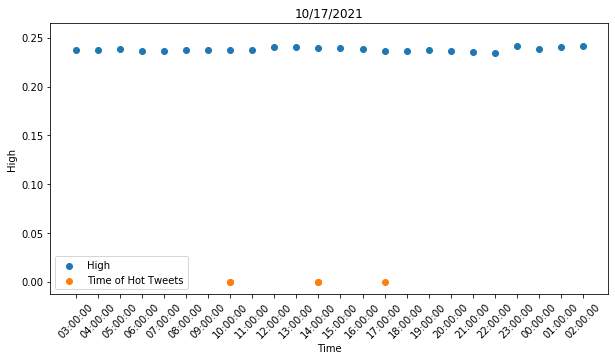

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-10-12 03:00:00+01:00,0.228734,0.228922,0.225279,0.225753,0,0,0
2021-10-12 04:00:00+01:00,0.225935,0.226329,0.222669,0.223561,38757632,0,0
2021-10-12 05:00:00+01:00,0.224019,0.227158,0.223095,0.227158,14803840,0,0
2021-10-12 06:00:00+01:00,0.226980,0.227078,0.222610,0.226430,32946304,0,0
2021-10-12 07:00:00+01:00,0.226244,0.226902,0.224496,0.224496,1586304,0,0
...,...,...,...,...,...,...,...
2021-10-18 23:00:00+01:00,0.247247,0.247247,0.244597,0.246904,0,0,0
2021-10-19 00:00:00+01:00,0.247300,0.248359,0.245253,0.247281,0,0,0
2021-10-19 01:00:00+01:00,0.247378,0.248850,0.243274,0.243274,16351744,0,0
2021-10-19 02:00:00+01:00,0.243561,0.247318,0.243561,0.246172,19886592,0,0


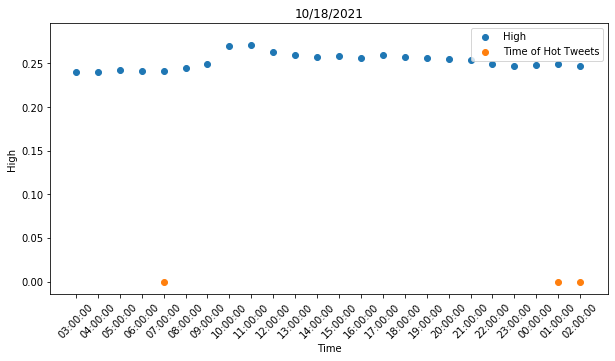

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-10-12 03:00:00+01:00,0.228734,0.228922,0.225279,0.225753,0,0,0
2021-10-12 04:00:00+01:00,0.225935,0.226329,0.222669,0.223561,38757632,0,0
2021-10-12 05:00:00+01:00,0.224019,0.227158,0.223095,0.227158,14803840,0,0
2021-10-12 06:00:00+01:00,0.226980,0.227078,0.222610,0.226430,32946304,0,0
2021-10-12 07:00:00+01:00,0.226244,0.226902,0.224496,0.224496,1586304,0,0
...,...,...,...,...,...,...,...
2021-10-18 23:00:00+01:00,0.247247,0.247247,0.244597,0.246904,0,0,0
2021-10-19 00:00:00+01:00,0.247300,0.248359,0.245253,0.247281,0,0,0
2021-10-19 01:00:00+01:00,0.247378,0.248850,0.243274,0.243274,16351744,0,0
2021-10-19 02:00:00+01:00,0.243561,0.247318,0.243561,0.246172,19886592,0,0


In [115]:
#collect hourly highest prices of Dogecoin
current_hour =datetime.datetime.now()
start = pytz.timezone( 'Europe/London').localize(current_hour-timedelta(days=7)).astimezone(pytz.timezone('EST'))
end = pytz.timezone( 'Europe/London').localize(current_hour).astimezone(pytz.timezone('EST'))
doge_df = yf.Ticker("DOGE-USD").history(start = start,end = end,interval = '1h')
display(doge_df)

time_list = tweet_df['Time'].to_list()
retweet_nums = tweet_df['Retweet_Count'].to_list()

x = []
y = []


for i,j in zip(range(7),range(0,7*24,24)):
    plt.figure(figsize = (10, 5))
    time_list2 = doge_df.index[j:j+24].to_list()
    time_list2 = [t.strftime("%H:%M:%S") for t in time_list2]
    tweet_time = []
    time_and_tweet = dict.fromkeys(tuple(time_list2),0)
    for k,l in zip(time_list,retweet_nums):
        if(k.strftime("%m/%d/%Y") == doge_df.index[j].strftime("%m/%d/%Y")):
            tweet_time.append(k.strftime("%H:00:00"))
            time_and_tweet[k.strftime("%H:00:00")] += l
            time_list.remove(k)
            retweet_nums.remove(l)
    #draw time vs. price plots to see if popular tweets posted in corresponding hours        
    plt.scatter(time_list2,doge_df['High'][j:j+24],label = 'High')
    plt.scatter(tweet_time,[0]*len(tweet_time),label = 'Time of Hot Tweets')
    plt.xticks(rotation = 45)
    plt.xlabel('Time')
    plt.ylabel('High')
    plt.title(doge_df.index[j].strftime("%m/%d/%Y"))
    plt.legend()
    plt.show()
    plt.savefig('cp_image/'+str(i)+'.png')
    plt.close()
    display(doge_df)
    
    #x = hourly retweet counts
    #y = hourly highest prices
    x.extend(time_and_tweet.values())
    y.extend(doge_df['High'][j:j+24].to_list())


In [100]:
#Linear Regression model built without current hour's data
#Calculate average retweet count after removing zeros
#Predict the highest Dogegcoin price in next hour with average retweet counts of tweets 
avg_retweet_count = sum([count for count in x[:len(x)-1] if count != 0 ])/len([count for count in x[:len(x)-1] if count != 0 ])
reg = LinearRegression().fit(np.array([x[:len(x)-1]]).reshape(-1,1),np.array(y[:len(y)-1]).reshape(-1,1))
predicted_price = reg.predict(np.array([avg_retweet_count]).reshape(-1,1))
actual_price = y[len(y)-1]
accuracy_rate = predicted_price[0][0]/actual_price * 100
print("Predicted Price:" + str(predicted_price[0][0]))
print("Actual Price:" + str(actual_price))
print("Dogecoin Price in last hour vs. current hour")
print("Accuracy Rate:"+str(accuracy_rate)+"%")

Predicted Price:0.23476980120827165
Actual Price:0.24884958565235138
Dogecoin Price in last hour vs. current hour
Accuracy Rate:94.342050276206%


In [116]:
print("current hour:"+str(current_hour))

current hour:2021-10-19 03:03:35.064788


In [117]:
#Linear Regression model built with current hour's data
#Calculate average retweet count after removing zeros
#Predict the highest Dogegcoin price in next hour with average retweet counts of tweets  
avg_retweet_count = sum([count for count in x if count != 0])/len([count for count in x if count != 0])
reg = LinearRegression().fit(np.array([x]).reshape(-1,1),np.array([y]).reshape(-1,1))
predicted_price = reg.predict(np.array([avg_retweet_count]).reshape(-1,1))
print("Predicted Price:" + str(predicted_price[0][0]))


Predicted Price:0.2350788944163482


In [118]:
#Linear Regression model built without  hour's data
next_hour = current_hour + timedelta(hours = 1)
start = pytz.timezone('Europe/London').localize(current_hour).astimezone(pytz.timezone('EST'))
end = pytz.timezone('Europe/London').localize(next_hour).astimezone(pytz.timezone('EST'))
test_df = yf.Ticker("DOGE-USD").history(start = start,end = end,interval = '1h')
display(test_df)
actual_price = test_df.iat[1,1]
accuracy_rate = predicted_price[0][0]/actual_price * 100
print("Dogecoin Price in current hour vs. next hour")
print("Predicted Price:" + str(predicted_price[0][0]))
print("Actual Price:" + str(actual_price))
print("Accuracy Rate:"+str(accuracy_rate)+"%")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-10-19 03:00:00+01:00,0.246299,0.247590,0.246218,0.247510,81030656,0,0
2021-10-19 04:00:00+01:00,0.247100,0.247324,0.246529,0.246529,15129600,0,0


Dogecoin Price in current hour vs. next hour
Predicted Price:0.2350788944163482
Actual Price:0.24732428789138794
Accuracy Rate:95.04885121496143%
